In [19]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision import  transforms
import torchvision
from PIL import Image
import numpy as np

import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [20]:
data_dir = "/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba"

len(os.listdir(data_dir))

202599

In [21]:
set([i[i.index('.'):] for i in os.listdir(data_dir)])

{'.jpg'}

In [22]:
img_transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

img_transforms

Compose(
    Resize(size=64, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(64, 64))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)

In [23]:
class CelebImages(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms

        self.image_path = [os.path.join(root_dir, img) for img in os.listdir(self.root_dir) if img.endswith(".jpg")]

    def __len__(self):
        return len(self.image_path)

    def __getitem__(self, index):
        img = self.image_path[index]
        img = Image.open(img).convert("RGB")
        if self.transforms:
            img = self.transforms(img)
        return img

In [24]:
celebs = CelebImages(root_dir=data_dir, transforms=img_transforms)

In [25]:
len(celebs), celebs[9].shape

(202599, torch.Size([3, 64, 64]))

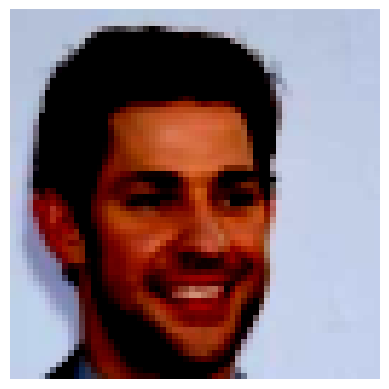

In [26]:
plt.imshow(celebs[0].permute(1, 2, 0))
plt.axis(False)
plt.show()

In [27]:
loader = DataLoader(dataset=celebs, batch_size=128, shuffle=True)
loader

In [28]:
X0 = next(iter(loader))
X0.shape, len(loader)

(torch.Size([128, 3, 64, 64]), 1583)

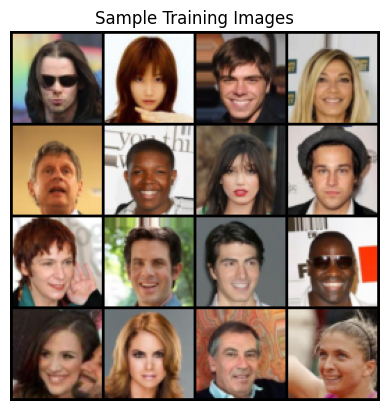

In [29]:
sample = next(iter(loader))  # get a batch
grid = torchvision.utils.make_grid(sample[:16], nrow=4, normalize=True)
plt.imshow(grid.permute(1, 2, 0))
plt.title("Sample Training Images")
plt.axis(False)
plt.show()

**Now our dataset is ready, let's build a good Convolutional GAN**

In [30]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'cuda'

In [31]:
!nvidia-smi

Mon May  5 08:06:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             31W /  250W |     855MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Model Building

[Epoch 0/10] [Batch 0/1583] [D loss: 0.6942883729934692] [G loss: 0.6914495229721069]
[Epoch 0/10] [Batch 100/1583] [D loss: 0.13245326280593872] [G loss: 1.5822439193725586]
[Epoch 0/10] [Batch 200/1583] [D loss: 0.09129124879837036] [G loss: 2.080284595489502]
[Epoch 0/10] [Batch 300/1583] [D loss: 0.05552711337804794] [G loss: 4.053309440612793]
[Epoch 0/10] [Batch 400/1583] [D loss: 0.09497393667697906] [G loss: 3.602771282196045]
[Epoch 0/10] [Batch 500/1583] [D loss: 0.14133571088314056] [G loss: 9.504874229431152]
[Epoch 0/10] [Batch 600/1583] [D loss: 0.04265258461236954] [G loss: 4.180569648742676]
[Epoch 0/10] [Batch 700/1583] [D loss: 0.05675117298960686] [G loss: 9.28668212890625]
[Epoch 0/10] [Batch 800/1583] [D loss: 0.04913058131933212] [G loss: 3.349423885345459]
[Epoch 0/10] [Batch 900/1583] [D loss: 0.05908888950943947] [G loss: 5.048701286315918]
[Epoch 0/10] [Batch 1000/1583] [D loss: 0.14294391870498657] [G loss: 3.9145588874816895]
[Epoch 0/10] [Batch 1100/1583] [

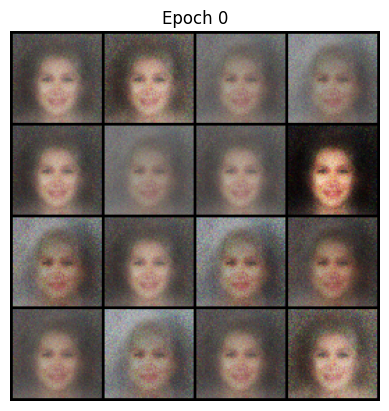

[Epoch 1/10] [Batch 0/1583] [D loss: 0.09778356552124023] [G loss: 3.8293089866638184]
[Epoch 1/10] [Batch 100/1583] [D loss: 0.11018981784582138] [G loss: 3.298341751098633]
[Epoch 1/10] [Batch 200/1583] [D loss: 0.13830843567848206] [G loss: 3.1228084564208984]
[Epoch 1/10] [Batch 300/1583] [D loss: 0.208591490983963] [G loss: 3.55562424659729]
[Epoch 1/10] [Batch 400/1583] [D loss: 0.4672032594680786] [G loss: 5.192734718322754]
[Epoch 1/10] [Batch 500/1583] [D loss: 0.19346794486045837] [G loss: 3.499152660369873]
[Epoch 1/10] [Batch 600/1583] [D loss: 0.17103217542171478] [G loss: 3.508390426635742]
[Epoch 1/10] [Batch 700/1583] [D loss: 0.34174713492393494] [G loss: 3.4908623695373535]
[Epoch 1/10] [Batch 800/1583] [D loss: 0.2654491662979126] [G loss: 2.9250264167785645]
[Epoch 1/10] [Batch 900/1583] [D loss: 0.38692110776901245] [G loss: 3.087855339050293]
[Epoch 1/10] [Batch 1000/1583] [D loss: 0.18242263793945312] [G loss: 3.223785877227783]
[Epoch 1/10] [Batch 1100/1583] [D 

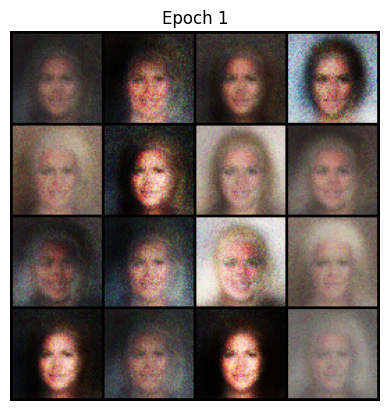

[Epoch 2/10] [Batch 0/1583] [D loss: 0.33028551936149597] [G loss: 3.431114435195923]
[Epoch 2/10] [Batch 100/1583] [D loss: 0.34150031208992004] [G loss: 3.0465807914733887]
[Epoch 2/10] [Batch 200/1583] [D loss: 0.21614089608192444] [G loss: 2.4559593200683594]
[Epoch 2/10] [Batch 300/1583] [D loss: 0.30099475383758545] [G loss: 3.8793272972106934]
[Epoch 2/10] [Batch 400/1583] [D loss: 0.5148673057556152] [G loss: 3.2461283206939697]
[Epoch 2/10] [Batch 500/1583] [D loss: 0.3957219421863556] [G loss: 2.7090508937835693]
[Epoch 2/10] [Batch 600/1583] [D loss: 0.3053188621997833] [G loss: 2.8193769454956055]
[Epoch 2/10] [Batch 700/1583] [D loss: 0.4407109320163727] [G loss: 2.8160839080810547]
[Epoch 2/10] [Batch 800/1583] [D loss: 0.3776823878288269] [G loss: 1.776989459991455]
[Epoch 2/10] [Batch 900/1583] [D loss: 0.3437827229499817] [G loss: 2.8565492630004883]
[Epoch 2/10] [Batch 1000/1583] [D loss: 0.27796703577041626] [G loss: 1.9793636798858643]
[Epoch 2/10] [Batch 1100/1583]

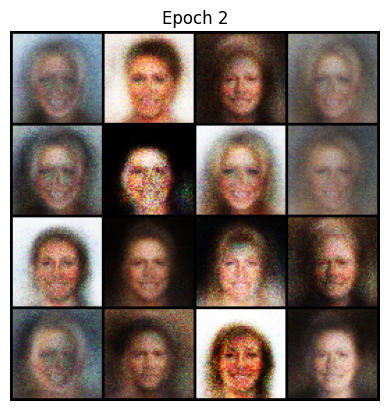

[Epoch 3/10] [Batch 0/1583] [D loss: 0.6367897987365723] [G loss: 2.2153472900390625]
[Epoch 3/10] [Batch 100/1583] [D loss: 0.5143733620643616] [G loss: 1.382638931274414]
[Epoch 3/10] [Batch 200/1583] [D loss: 0.4872060716152191] [G loss: 2.0849924087524414]
[Epoch 3/10] [Batch 300/1583] [D loss: 0.3651456832885742] [G loss: 2.5880141258239746]
[Epoch 3/10] [Batch 400/1583] [D loss: 0.38246649503707886] [G loss: 2.3512015342712402]
[Epoch 3/10] [Batch 500/1583] [D loss: 0.3118746876716614] [G loss: 2.691598415374756]
[Epoch 3/10] [Batch 600/1583] [D loss: 0.37279149889945984] [G loss: 2.0240066051483154]
[Epoch 3/10] [Batch 700/1583] [D loss: 0.38206037878990173] [G loss: 1.7785000801086426]
[Epoch 3/10] [Batch 800/1583] [D loss: 0.4228378236293793] [G loss: 2.343088150024414]
[Epoch 3/10] [Batch 900/1583] [D loss: 0.3200424015522003] [G loss: 2.361426830291748]
[Epoch 3/10] [Batch 1000/1583] [D loss: 0.40460652112960815] [G loss: 2.208230495452881]
[Epoch 3/10] [Batch 1100/1583] [D 

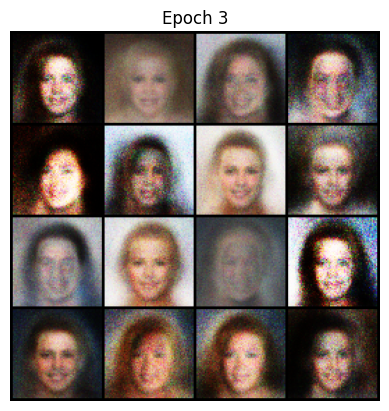

[Epoch 4/10] [Batch 0/1583] [D loss: 0.41617804765701294] [G loss: 1.9536497592926025]


In [ ]:
%%time

class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, img_channels * 64 * 64),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 3, 64, 64)  # Reshape to image format
        return img

class Discriminator(nn.Module):
    def __init__(self, img_channels=3):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(img_channels * 64 * 64, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

adversarial_loss = nn.BCELoss()
generator = Generator(z_dim=100)
discriminator = Discriminator()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = generator.to(device)
discriminator = discriminator.to(device)

def train(generator, discriminator, dataloader, epochs=5):
    for epoch in range(epochs):
        for i, imgs in enumerate(dataloader):
            real_imgs = imgs.to(device)
            batch_size = real_imgs.size(0)
            valid = torch.ones(batch_size, 1).to(device)
            fake = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_imgs), valid)
            fake_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device)).detach()), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            g_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device))), valid)
            g_loss.backward()
            optimizer_G.step()

            if i % 100 == 0:
                print(f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

        # Optionally, save generated images at each epoch
        save_generated_images(generator, epoch, device)

def save_generated_images(generator, epoch, device, num_images=16):
    z = torch.randn(num_images, 100).to(device)
    generated_imgs = generator(z).detach().cpu()
    grid = torchvision.utils.make_grid(generated_imgs, nrow=4, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title(f"Epoch {epoch}")
    plt.axis('off')
    plt.show()

# Start training
train(generator, discriminator, loader, epochs=10)

In [ ]:
class GeneratorNN(nn.Module):
    def __init__(self, z_dim, num_channeles):
        super().__init__()
        self.noise_layer = nn.Sequential(
            nn.Linear(in_features=z_dim, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=2048),
            nn.ReLU(),
            nn.Linear(in_features=2048, out_features=8192),
            nn.ReLU()
        )

        self.generator_conv = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=num_channeles, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        x = self.noise_layer(z)
        x = x.view(x.shape[0], 128, 8, 8)
        return self.generator_conv(x)

Generator = GeneratorNN(z_dim=100, num_channeles=3)
Generator.to(device=device)

Generator

GeneratorNN(
  (noise_layer): Sequential(
    (0): Linear(in_features=100, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=2048, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2048, out_features=8192, bias=True)
    (5): ReLU()
  )
  (generator_conv): Sequential(
    (0): ConvTranspose2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Tanh()
  )
)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model=Generator, input_size=(128, 100), col_names=["input_size", "output_size", "num_params", "trainable"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
GeneratorNN                              [128, 100]                [128, 3, 64, 64]          --                        True
├─Sequential: 1-1                        [128, 100]                [128, 8192]               --                        True
│    └─Linear: 2-1                       [128, 100]                [128, 512]                51,712                    True
│    └─ReLU: 2-2                         [128, 512]                [128, 512]                --                        --
│    └─Linear: 2-3                       [128, 512]                [128, 2048]               1,050,624                 True
│    └─ReLU: 2-4                         [128, 2048]               [128, 2048]               --                        --
│    └─Linear: 2-5                       [128, 2048]               [128, 8192]               16,785,408                True
│    └─

In [ ]:
z = torch.randn(size=(128, 100))
Generator(z.to(device=device)).shape

torch.Size([128, 3, 64, 64])

In [ ]:
class DiscrimiatorNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.discriminator_nn = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=8192, out_features=2048),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.Linear(in_features=2048, out_features=64),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.Linear(in_features=64, out_features=1),
            # nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.discriminator_nn(x)
        return self.classifier(x)

Discrimiator = DiscrimiatorNN()
Discrimiator.to(device=device)

Discrimiator

DiscrimiatorNN(
  (discriminator_nn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=2048, bias=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Linear(in_features=2048, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5

In [ ]:
from torchinfo import summary

summary(model=Discrimiator, input_size=(128, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
DiscrimiatorNN                           [128, 1]                  --
├─Sequential: 1-1                        [128, 128, 8, 8]          --
│    └─Conv2d: 2-1                       [128, 64, 64, 64]         1,792
│    └─LeakyReLU: 2-2                    [128, 64, 64, 64]         --
│    └─MaxPool2d: 2-3                    [128, 64, 32, 32]         --
│    └─Conv2d: 2-4                       [128, 128, 32, 32]        73,856
│    └─LeakyReLU: 2-5                    [128, 128, 32, 32]        --
│    └─MaxPool2d: 2-6                    [128, 128, 16, 16]        --
│    └─Conv2d: 2-7                       [128, 128, 16, 16]        147,584
│    └─LeakyReLU: 2-8                    [128, 128, 16, 16]        --
│    └─MaxPool2d: 2-9                    [128, 128, 8, 8]          --
├─Sequential: 1-2                        [128, 1]                  --
│    └─Flatten: 2-10                     [128, 8192]               --
│  

In [ ]:
Discrimiator(torch.randn(size=(128, 3, 64, 64)).to(device=device)).shape

torch.Size([128, 1])

In [ ]:
Generator, Discrimiator

(GeneratorNN(
   (noise_layer): Sequential(
     (0): Linear(in_features=100, out_features=512, bias=True)
     (1): ReLU()
     (2): Linear(in_features=512, out_features=2048, bias=True)
     (3): ReLU()
     (4): Linear(in_features=2048, out_features=8192, bias=True)
     (5): ReLU()
   )
   (generator_conv): Sequential(
     (0): ConvTranspose2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
     (1): ReLU()
     (2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
     (3): ReLU()
     (4): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
     (5): ReLU()
     (6): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (7): Tanh()
   )
 ),
 DiscrimiatorNN(
   (discriminator_nn): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): LeakyReLU(negative_slope=0.2, inplace=True)
     (2): Max

In [ ]:
gan_loss = nn.BCEWithLogitsLoss()

generator_optimizer = torch.optim.Adam(params=Generator.parameters(), lr=2e-4, betas=(0.5, 0.999))
discriminator_optimizer = torch.optim.Adam(params=Discrimiator.parameters(), lr=1e-4, betas=(0.5, 0.999))

gan_loss, generator_optimizer, discriminator_optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.5, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0002
     maximize: False
     weight_decay: 0
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.5, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ))

Batch: 0, D loss: 0.6938247084617615, G loss: 0.6510293483734131
Batch: 200, D loss: 0.0594390444457531, G loss: 2.875826120376587
Batch: 400, D loss: 0.5585662126541138, G loss: 1.3378477096557617
Batch: 600, D loss: 0.32079505920410156, G loss: 1.5529234409332275
Batch: 800, D loss: 0.6858402490615845, G loss: 1.689825177192688
Batch: 1000, D loss: 0.23998484015464783, G loss: 1.783724308013916
Batch: 1200, D loss: 0.18926554918289185, G loss: 3.002798080444336
Batch: 1400, D loss: 0.12357241660356522, G loss: 2.606276035308838


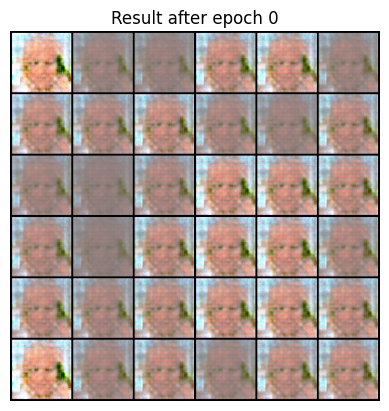

Batch: 0, D loss: 0.35240235924720764, G loss: 1.55348539352417
Batch: 200, D loss: 0.3077738583087921, G loss: 2.4883317947387695
Batch: 400, D loss: 0.6071321964263916, G loss: 3.377307653427124
Batch: 600, D loss: 0.3987272381782532, G loss: 1.268029808998108
Batch: 800, D loss: 0.5771319270133972, G loss: 1.768756628036499
Batch: 1000, D loss: 0.3537966012954712, G loss: 1.5567206144332886
Batch: 1200, D loss: 0.3928653597831726, G loss: 2.029606580734253
Batch: 1400, D loss: 0.2588111162185669, G loss: 1.6783974170684814


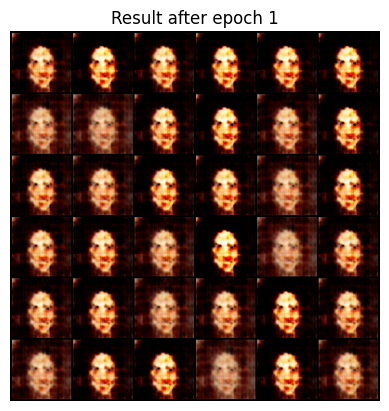

Batch: 0, D loss: 0.2517543137073517, G loss: 2.1482553482055664
Batch: 200, D loss: 0.3757089376449585, G loss: 1.8856626749038696
Batch: 400, D loss: 0.3630339503288269, G loss: 1.608504056930542
Batch: 600, D loss: 0.1866559386253357, G loss: 3.1727781295776367
Batch: 800, D loss: 0.14763709902763367, G loss: 3.1171178817749023
Batch: 1000, D loss: 0.5770049691200256, G loss: 3.1145975589752197
Batch: 1200, D loss: 0.3757719397544861, G loss: 2.309257984161377
Batch: 1400, D loss: 0.3835555911064148, G loss: 2.0490260124206543


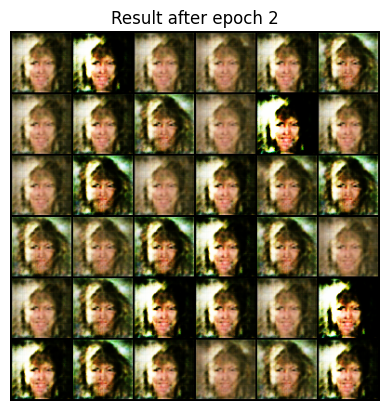

Batch: 0, D loss: 0.3410002589225769, G loss: 1.656561255455017
Batch: 200, D loss: 0.5036720037460327, G loss: 1.657529592514038
Batch: 400, D loss: 0.26676347851753235, G loss: 1.8101311922073364
Batch: 600, D loss: 0.4960706830024719, G loss: 2.5855021476745605
Batch: 800, D loss: 0.49690544605255127, G loss: 1.6176594495773315
Batch: 1000, D loss: 0.6316226720809937, G loss: 1.848249077796936
Batch: 1200, D loss: 0.6124869585037231, G loss: 1.5883712768554688
Batch: 1400, D loss: 0.5483090877532959, G loss: 1.8627903461456299


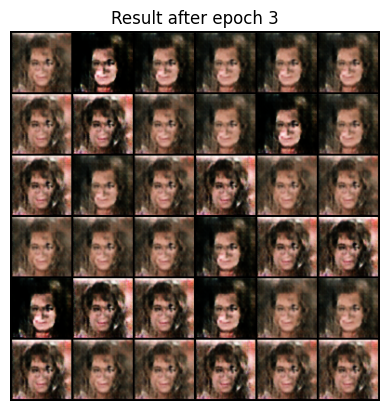

Batch: 0, D loss: 0.39481937885284424, G loss: 2.760982036590576
Batch: 200, D loss: 0.3188779950141907, G loss: 1.6457462310791016
Batch: 400, D loss: 0.5828917026519775, G loss: 1.556265115737915
Batch: 600, D loss: 0.5784493684768677, G loss: 1.8070542812347412
Batch: 800, D loss: 0.33061617612838745, G loss: 2.187286853790283
Batch: 1000, D loss: 0.5242670774459839, G loss: 1.359785556793213
Batch: 1200, D loss: 0.2747451066970825, G loss: 2.3090450763702393
Batch: 1400, D loss: 0.2314227819442749, G loss: 2.284525156021118


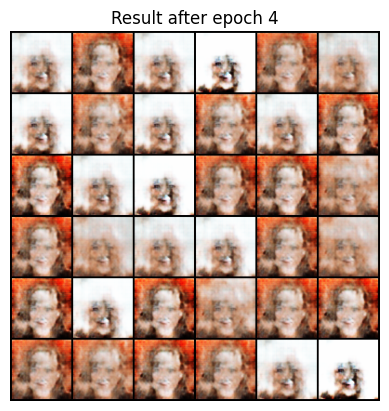

Batch: 0, D loss: 0.2533445358276367, G loss: 3.2676005363464355


KeyboardInterrupt: 

In [ ]:
%%time
epochs = 10

Generator = Generator.to(device=device)
Discrimiator = Discrimiator.to(device=device)
for epoch in range(epochs):
    for batch, X in enumerate(loader):
        batch_size = X.shape[0]
        X = X.to(device=device)

        reals = torch.ones(size=(batch_size, 1)).to(device=device)
        fakes = torch.zeros(size=(batch_size, 1)).to(device=device)

        # Train discriminators
        Discrimiator.train()
        discriminator_optimizer.zero_grad()
        real_loss = gan_loss(Discrimiator(X), reals)
        # We use .detach() below because we want same output from generator to go to discriminator
        # So you don’t want gradients to flow back into G, otherwise G’s weights will get updated wrongly while D is being trained.

        z = torch.randn(size=(batch_size, 100)).to(device=device)
        fake_images = Generator(z)
        fake_images_detach = fake_images.detach()
        fake_output = Discrimiator(fake_images_detach)
        fake_loss = gan_loss(fake_output, fakes)
        disc_loss = (real_loss + fake_loss) / 2
        disc_loss.backward()
        # Gradient clipping
        torch.nn.utils.clip_grad_norm(parameters=Discrimiator.parameters(), max_norm=1.0)
        discriminator_optimizer.step()

        # Train generators
        Generator.train()
        generator_optimizer.zero_grad()
        # Not using .detach() below because we wanted to update only Generator not discriminator
        # using .detach() means generator not getting updated, and weights will remain constant
        gen_loss = gan_loss(Discrimiator(Generator((torch.randn(size=(batch_size, 100)).to(device=device)))), reals)
        gen_loss.backward()
        torch.nn.utils.clip_grad_norm(Generator.parameters(), max_norm=1.0)
        generator_optimizer.step()

        if batch%200==0:
            print(f"Batch: {batch}, D loss: {disc_loss}, G loss: {gen_loss}")

    with torch.no_grad():
      Generator.eval()
      z = torch.randn(size=(36, 100)).to(device=device)
      epoch_res = Generator(z).cpu().detach()
      grid = torchvision.utils.make_grid(epoch_res, nrow=6, normalize=True)
      plt.imshow(np.transpose(grid, (1, 2, 0)))
      plt.title(f"Result after epoch {epoch}")
      plt.axis(False)
      plt.show()
